In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, warnings, time

from datetime import datetime, timedelta

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../Edu/code/data/27_problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


# 머신러닝

## 1 데이터 전처리

### 1-1

데이터의 특징 파악 (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [4]:
df.Class.unique()

array([0, 1], dtype=int64)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


총 1193개의 데이터로 이루어졌음을 확인했다. 모든 변수는 수치형 변수이고,  
Class는 0과 1로 이루어진 이진 변수이다. 또한 결측값이 존재하지 않는다.  
Class 변수 외 모두 연속형 변수로 확인된다.

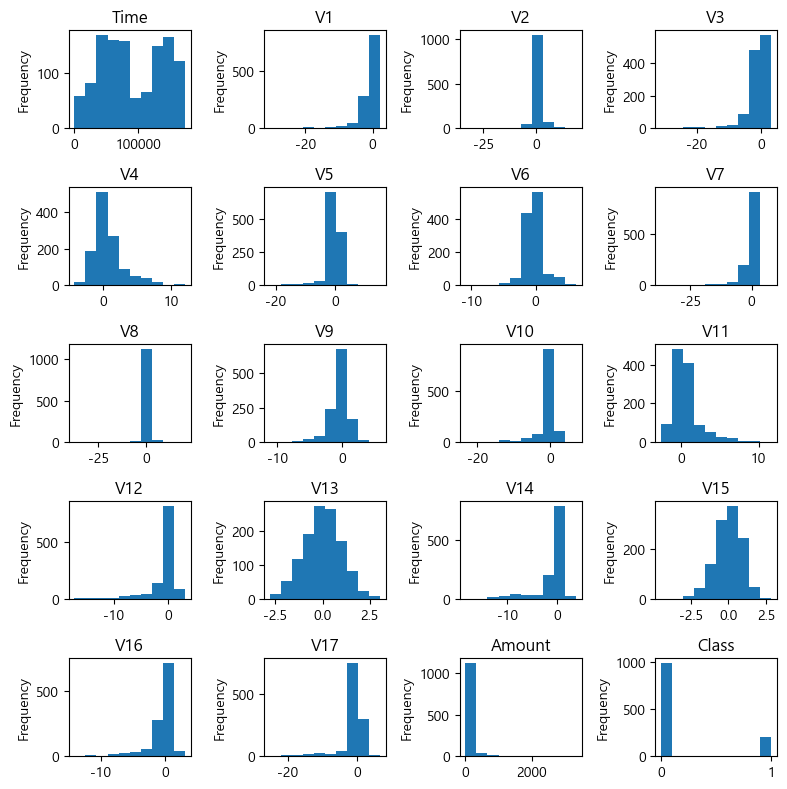

In [7]:
plt.figure(figsize=(8, 8))
for idx, col in enumerate(df.columns):
    plt.subplot(5, 4, idx+1)
    df[col].plot(kind='hist')
    plt.title(col)

plt.tight_layout()
plt.show();

모든 변수의 히스토그램을 살펴본 결과, V1 ~ V17 컬럼은 대부분 0 근처에  
데이터가 분포하고 있다. Amount 또한 마찬가지이며 이진 변수인  
Class의 데이터 분포가 불균형한 것을 확인할 수 있다.

In [11]:
df.Class.value_counts() / len(df)

Class
0    0.832355
1    0.167645
Name: count, dtype: float64

Class 변수의 클래스 비율을 살펴보니 약 83:17 정도로 불균형하다.

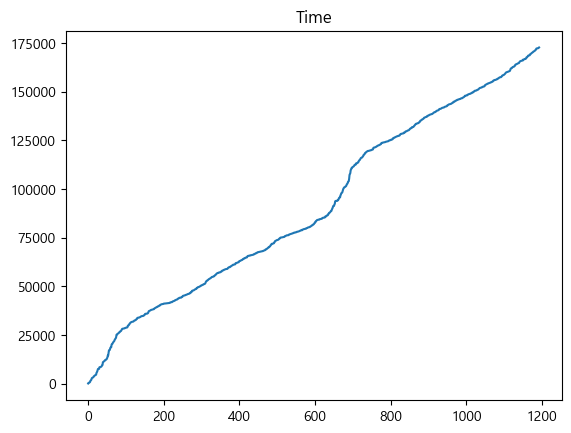

In [15]:
plt.title('Time')
df.Time.plot();

Time 변수는 누적된 시간을 나타내는 변수로 보인다.

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,,
0,94258.217523,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,77891.855000,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


Class별 변수들의 평균을 살펴보면 Class가 0인 경우 V1 ~ V17 또한  
평균이 0에 가깝고, Class 1의 경우에는 0에서 편차가 있는 편이다.  

Class 0인 경우에 Time의 평균이 크고, Amount 평균이 작았으며,  
Class 1인 경우에 TIme의 평균이 작고, Amount 평균이 컸다.

히스토그램으로 살펴본 V1 ~ V17 변수의 경우 0 부근에 분포가 많았기 때문에,  
Class 0으로 분류된 데이터가 많았을 것으로 보인다.

### 1-2

상관관계 시각화 및 필요한 전처리 설명

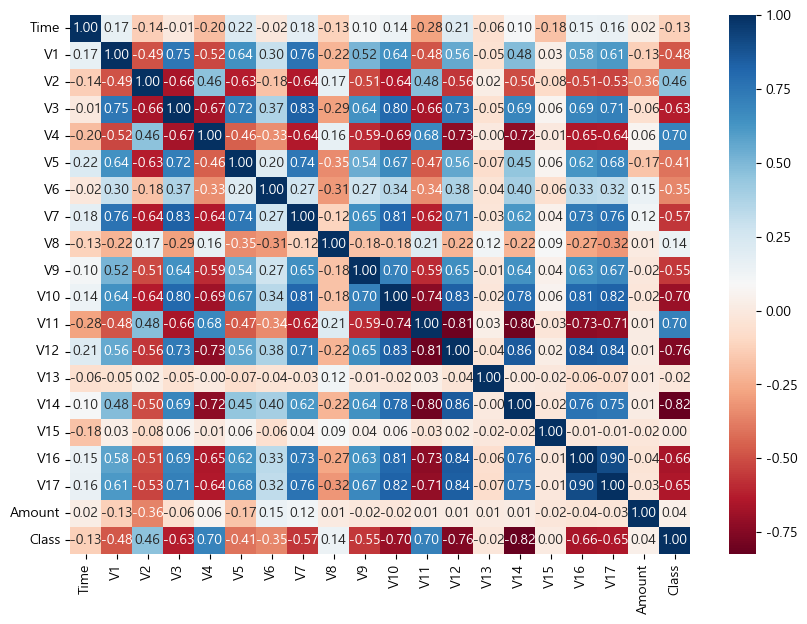

In [20]:
corr_df = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='RdBu');

전체적으로 상관관계가 높은 것을 확인할 수 있다.  
특히 Class 변수와 강한 상관관계를 보이는 변수로는  
V4, V10, V11, V12, V14, V16, V17 변수가 있다.



## 2 차원축소

### 2-1

차원축소 방법 2가지 이상을 비교하고 한 가지를 선택

### 2-2

선택한 방법을 수행하고, 선택한 이유 설명

## 3 오버 / 언더 샘플링

### 3-1

오버샘플링과 언더샘플링의 장단점을 비교하고 선택

### 3-2

분류분석 모델 구현 및 선택한 샘플링 기법 중 2가지 이상의  
알고리즘으로 모델을 비교하고 성능 측정

### 3-3

현재까지 전처리한 데이터를 통해 분류 모델 수행 후 결과 분석

## 4 이상탐지 모델

### 4-1

이상탐지 모델 2가지 이상을 기술하고 장단점 설명

### 4-2

앞서 전처리한 데이터로 한가지 이상의 탐지 모델 구현 및  
3 에서 만든 모델과 비교

### 4-3

데이터분석과 관점에서 3의 모델과 4의 모델을 설명

# 통계분석

## 1

2년 전 제품 생산량이 100000개, 1년 전 제품 생산량이 150000개,  
그후 기술 상승으로 제품 생산량이 250000개 되었을 때 연평균  
상승률의 대표값을 구하라 (소수점 아래 셋째 자리에서 반올림)

## 2

12건의 광고시간 측정 데이터에서 평균은 15.5초, 분산은 3.2초였다.  
이때 광고시간의 90% 신뢰구간을 구하시오.

## 3

강의 상류와 하류의 생물다양성 점수에 차이가 있는지 유의수준 0.1 하에 검정  
(단, 같은 강에서 상/하류는 서로 독립이 아니고, 정규성을 만족한다고 가정)

- (1) 가설수립
- (2) 검정통계량, 유의확률 구하기, 연구가설 채택여부 검정

In [6]:
data = pd.read_csv('../Edu/code/data/27_problem7.csv')
data.head()

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


## 4

usercounts를 종속변수로 하는 데이터

- (1) 분위수 회귀분석을 사용해 회귀계수 구하기  
  (소수점 아래 셋째자리에서 반올림)
- (2) (1)의 회귀계수를 활용해 temperature 10.5, wind 8.2,  
  precipitation 3.5일 때 user_counts 예측 (반올림하여 소수 둘째 자리까지)

In [8]:
data = pd.read_csv('../Edu/code/data/27_problem8.csv')
data.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


## 5

지하철 호선과 월별 승객수 간 상관관계가 있는지 확인

- (1) 가설수립
- (2) Type III Anova를 사용하여 상관관계 검정

In [9]:
data = pd.read_csv('../Edu/code/data/27_problem9.csv')
data.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
